# Wavelet Software

### Was provided by C. Torrence and G. Compo, and is available at URL: http://atoc.colorado.edu/research/wavelets/

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


variance =  0.5392375741582254
lag1 =  0.72
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31.] [1.93602662 1.62799784 1.36897755 1.15116831 0.96801331 0.81399892
 0.68448878 0.57558416 0.48400665 0.40699946 0.34224439 0.28779208
 0.24200333 0.20349973 0.17112219 0.14389604 0.12100166 0.10174987
 0.0855611  0.07194802 0.06050083 0.05087493 0.04278055 0.03597401
 0.03025042 0.02543747 0.02139027 0.017987   0.01512521 0.01271873
 0.01069514 0.0089935 ]
[  0.5          0.59460356   0.70710678   0.84089642   1.
   1.18920712   1.41421356   1.68179283   2.           2.37841423
   2.82842712   3.36358566   4.           4.75682846   5.65685425
   6.72717132   8.           9.51365692  11.3137085   13.45434264
  16.          19.02731384  22.627417    26.90868529  32.
  38.05462768  45.254834    53.81737058  64.          76.10925536
  90.50966799 107.63474115] 32


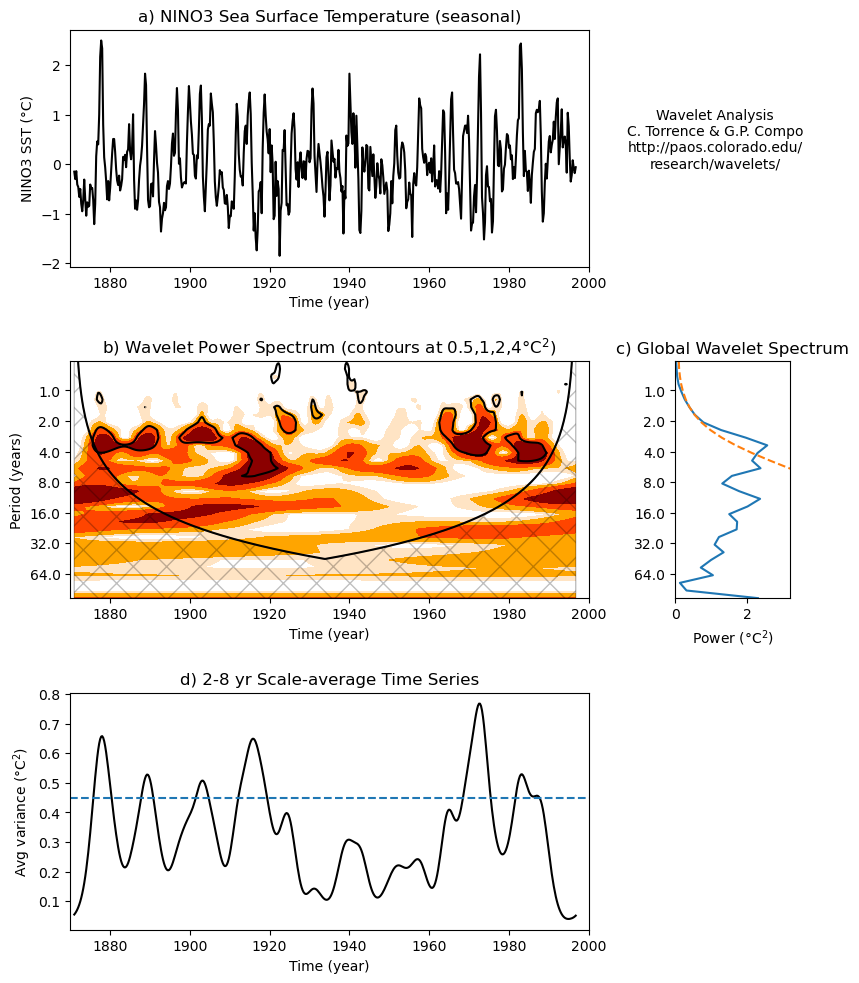

In [1]:
import waveletAnalysis
from waveletFunctions import wave_signif, wavelet

In [2]:
scale

NameError: name 'scale' is not defined

variance =  0.5392375741582254
lag1 =  0.72
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31.] [1.93602662 1.62799784 1.36897755 1.15116831 0.96801331 0.81399892
 0.68448878 0.57558416 0.48400665 0.40699946 0.34224439 0.28779208
 0.24200333 0.20349973 0.17112219 0.14389604 0.12100166 0.10174987
 0.0855611  0.07194802 0.06050083 0.05087493 0.04278055 0.03597401
 0.03025042 0.02543747 0.02139027 0.017987   0.01512521 0.01271873
 0.01069514 0.0089935 ]
[  0.5          0.59460356   0.70710678   0.84089642   1.
   1.18920712   1.41421356   1.68179283   2.           2.37841423
   2.82842712   3.36358566   4.           4.75682846   5.65685425
   6.72717132   8.           9.51365692  11.3137085   13.45434264
  16.          19.02731384  22.627417    26.90868529  32.
  38.05462768  45.254834    53.81737058  64.          76.10925536
  90.50966799 107.63474115] 32


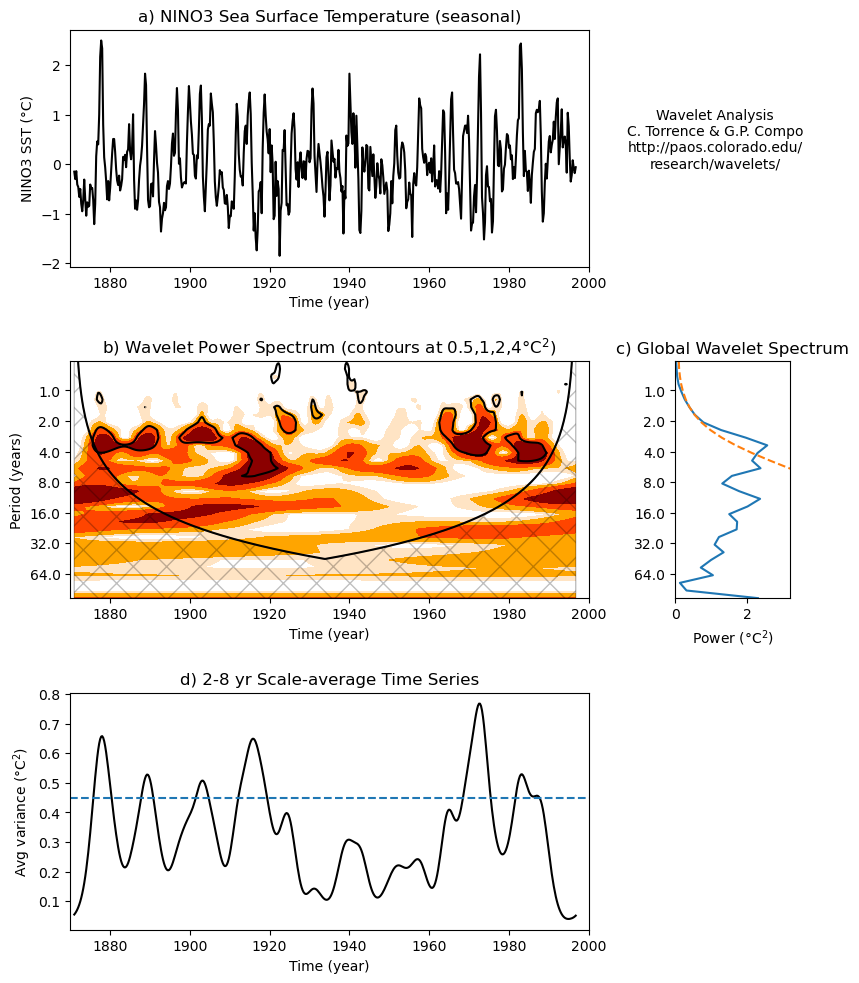

In [3]:
%run waveletAnalysis.py


NameError: name 'j' is not defined

# Corriendo sobre datos de Auger (sin ajuste de escala)

In [2]:
import matplotlib.pylab as plt
import matplotlib.ticker as ticker
from matplotlib.gridspec import GridSpec
import pandas as pd
import numpy as np
# from mpl_toolkits.axes_grid1 import make_axes_locatable

from waveletFunctions import wave_signif, wavelet

import sys


sys.path.append('../augerscalerpy')
from scaler_cleaning import scaler_clean, plot_data

In [37]:
# READ THE DATA
#sst = np.loadtxt('sst_nino3.dat')  # input SST time series
dataset = scaler_clean('../scaler_datasets/scaler_300s_FINAL.csv','scaler_300s_N9')
#sst.set_index('Date', inplace=True) # Establece la columna 'Date' como el índice del DataFrame

Hay  (13663, 6) líneas vacías


/home/jennifer/Documentos/msc_tesis/scaler_for_solar_analysis/wave_python/../augerscalerpy/scaler_cleaning.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SDOK["Date"] = datetime.values


In [38]:
sstA = np.loadtxt('sst_nino3.dat')  # input SST time series
len(sstA)

504

In [39]:
subset = dataset['ScalerCorr'].iloc[:504]
#subset['ScalerCorr'] = subset['ScalerCorr'].apply(lambda x: x[0])  # Extrae el primer valor de cada lista
#dataset = pd.DataFrame({'ScalerCorr': subset})
#sst= dataset.values.tolist()
#sst = np.array(subset)
sst = subset.values

In [41]:
sst = sst - np.mean(sst)
variance = np.std(sst, ddof=1) ** 2
print("variance = ", variance)

variance =  94.71108031769698


In [42]:
if 0:
    variance = 1.0
    sst = sst / np.std(sst, ddof=1)
n = len(sst)
dt = 0.25
time = np.arange(len(sst)) * dt + 1871.0  # construct time array
xlim = ([1870, 2000])  # plotting range
pad = 1  # pad the time series with zeroes (recommended)
dj = 0.25  # this will do 4 sub-octaves per octave
s0 = 2 * dt  # this says start at a scale of 6 months
j1 = 7 / dj  # this says do 7 powers-of-two with dj sub-octaves each
lag1 = 0.72  # lag-1 autocorrelation for red noise background
print("lag1 = ", lag1)
mother = 'MORLET'

lag1 =  0.72


In [43]:
sst.shape

(504,)

In [44]:
# Wavelet transform:
wave, period, scale, coi = wavelet(sst, dt, pad, dj, s0, j1, mother)
power = (np.abs(wave)) ** 2  # compute wavelet power spectrum
global_ws = (np.sum(power, axis=1) / n)  # time-average over all times


In [45]:

# Significance levels:
signif = wave_signif(([variance]), dt=dt, sigtest=0, scale=scale,
    lag1=lag1, mother=mother)
# expand signif --> (J+1)x(N) array
sig95 = signif[:, np.newaxis].dot(np.ones(n)[np.newaxis, :])
sig95 = power / sig95  # where ratio > 1, power is significant

# Global wavelet spectrum & significance levels:
dof = n - scale  # the -scale corrects for padding at edges
global_signif = wave_signif(variance, dt=dt, scale=scale, sigtest=1,
    lag1=lag1, dof=dof, mother=mother)

# Scale-average between El Nino periods of 2--8 years
avg = np.logical_and(scale >= 2, scale < 8)
Cdelta = 0.776  # this is for the MORLET wavelet
# expand scale --> (J+1)x(N) array
scale_avg = scale[:, np.newaxis].dot(np.ones(n)[np.newaxis, :])
scale_avg = power / scale_avg  # [Eqn(24)]
scale_avg = dj * dt / Cdelta * sum(scale_avg[avg, :])  # [Eqn(24)]
scaleavg_signif = wave_signif(variance, dt=dt, scale=scale, sigtest=2,
    lag1=lag1, dof=([2, 7.9]), mother=mother)

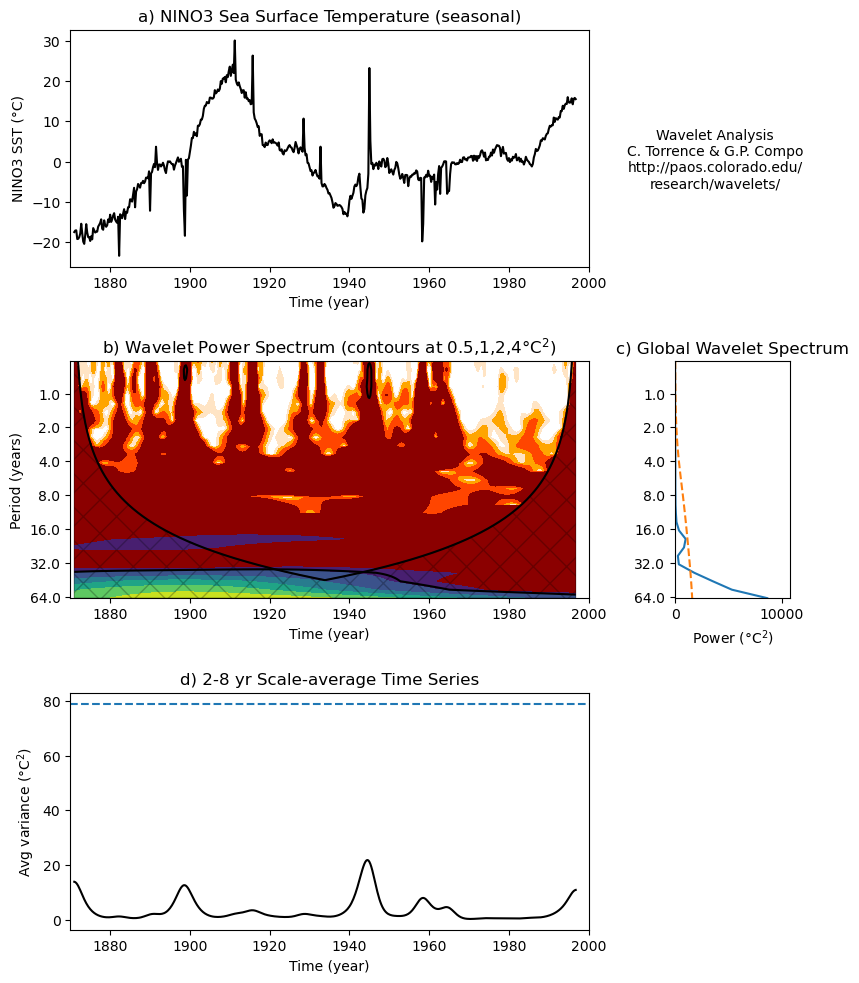

In [46]:
# ------------------------------------------------------ Plotting

# --- Plot time series
fig = plt.figure(figsize=(9, 10))
gs = GridSpec(3, 4, hspace=0.4, wspace=0.75)
plt.subplots_adjust(left=0.1, bottom=0.05, right=0.9, top=0.95,
                    wspace=0, hspace=0)
plt.subplot(gs[0, 0:3])
plt.plot(time, sst, 'k')
plt.xlim(xlim[:])
plt.xlabel('Time (year)')
plt.ylabel('NINO3 SST (\u00B0C)')
plt.title('a) NINO3 Sea Surface Temperature (seasonal)')

plt.text(time[-1] + 35, 0.5, 'Wavelet Analysis\nC. Torrence & G.P. Compo\n'
    'http://paos.colorado.edu/\nresearch/wavelets/',
    horizontalalignment='center', verticalalignment='center')

# --- Contour plot wavelet power spectrum
# plt3 = plt.subplot(3, 1, 2)
plt3 = plt.subplot(gs[1, 0:3])
levels = [0, 0.5, 1, 2, 4, 999]
# *** or use 'contour'
CS = plt.contourf(time, period, power, len(levels))
im = plt.contourf(CS, levels=levels,
    colors=['white', 'bisque', 'orange', 'orangered', 'darkred'])
plt.xlabel('Time (year)')
plt.ylabel('Period (years)')
plt.title('b) Wavelet Power Spectrum (contours at 0.5,1,2,4\u00B0C$^2$)')
plt.xlim(xlim[:])
# 95# significance contour, levels at -99 (fake) and 1 (95# signif)
plt.contour(time, period, sig95, [-99, 1], colors='k')
# cone-of-influence, anything "below" is dubious
plt.fill_between(time, coi * 0 + period[-1], coi, facecolor="none",
    edgecolor="#00000040", hatch='x')
plt.plot(time, coi, 'k')
# format y-scale
plt3.set_yscale('log', base=2, subs=None)
plt.ylim([np.min(period), np.max(period)])
ax = plt.gca().yaxis
ax.set_major_formatter(ticker.ScalarFormatter())
plt3.ticklabel_format(axis='y', style='plain')
plt3.invert_yaxis()
# set up the size and location of the colorbar
# position=fig.add_axes([0.5,0.36,0.2,0.01])
# plt.colorbar(im, cax=position, orientation='horizontal')
#   , fraction=0.05, pad=0.5)

# plt.subplots_adjust(right=0.7, top=0.9)

# --- Plot global wavelet spectrum
plt4 = plt.subplot(gs[1, -1])
plt.plot(global_ws, period)
plt.plot(global_signif, period, '--')
plt.xlabel('Power (\u00B0C$^2$)')
plt.title('c) Global Wavelet Spectrum')
plt.xlim([0, 1.25 * np.max(global_ws)])
# format y-scale
plt4.set_yscale('log', base=2, subs=None)
plt.ylim([np.min(period), np.max(period)])
ax = plt.gca().yaxis
ax.set_major_formatter(ticker.ScalarFormatter())
plt4.ticklabel_format(axis='y', style='plain')
plt4.invert_yaxis()

# --- Plot 2--8 yr scale-average time series
plt.subplot(gs[2, 0:3])
plt.plot(time, scale_avg, 'k')
plt.xlim(xlim[:])
plt.xlabel('Time (year)')
plt.ylabel('Avg variance (\u00B0C$^2$)')
plt.title('d) 2-8 yr Scale-average Time Series')
plt.plot(xlim, scaleavg_signif + [0, 0], '--')

plt.show()

# Sobre los datos de Oulu (replicación de los resultados del paper)

In [22]:
CRIdf = pd.read_csv('../nm_data/CRI_auger-NMs.csv')
CRIdf

,date,counts/s,counts/s_2,counts/s_3,counts/s_4,counts/s_5,ScalerCorr,errmean,arrvar,activeSD,pressure
0,1990-01-01 00:00:00,0.834653,1.001531,1.006974,0.934069,1.001531,1.000000,0.000000,NaN,NaN,NaN
1,1990-01-01 03:00:00,0.835578,0.926468,1.006974,0.936287,0.926468,1.000000,0.000000,NaN,NaN,NaN
2,1990-01-01 06:00:00,0.839871,0.926723,1.006974,0.934765,0.926723,1.000000,0.000000,NaN,NaN,NaN
3,1990-01-01 09:00:00,0.838555,0.925214,1.006974,0.933133,0.925214,1.000000,0.000000,NaN,NaN,NaN
4,1990-01-01 12:00:00,0.838975,0.926668,1.006974,0.937709,0.926668,1.000000,0.000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
96290,2022-12-31 09:00:00,0.989913,1.000000,0.882938,0.993959,1.000000,1.003201,0.283859,3611.068182,486.818182,856.868636
96291,2022-12-31 12:00:00,0.988797,1.000000,0.882110,1.000053,1.000000,1.003201,0.283859,3611.068182,486.818182,856.868636
96292,2022-12-31 15:00:00,0.992040,1.000000,0.881771,1.000048,1.000000,1.003201,0.283859,3611.068182,486.818182,856.868636
96293,2022-12-31 18:00:00,0.991639,1.000000,0.880878,1.001411,1.000000,1.003201,0.283859,3611.068182,486.818182,856.868636


In [28]:
#subset = CRIdf['counts/s'].iloc[:730]
subset = CRIdf['counts/s_2']
sst = subset.values
len(sst)

96295

In [29]:
#sst = sst - np.mean(sst)
variance = np.std(sst, ddof=1) ** 2
print("variance = ", variance)

# Adjust dt to represent daily data (0.25 corresponds to 6 hours, not a full day)
n = len(sst)
dt = 0.00411  # 3 horas en unidades de años
time = np.arange(len(sst)) * dt + 1990.0  # Construct time array starting from 1990
xlim = ([1990, 2022])  # Modify the plotting range to cover the two years

# Otros parámetros
pad = 1
#dj = 0.125 
#s0 = 2 * dt  # Escoge un valor apropiado según tu escala de interés
#j1 = 7 / dj  # Escoge un valor adecuado según la resolución requerida
lag1 = 0.72
print("lag1 = ", lag1)
mother = 'MORLET'

variance =  0.0008987612069477496
lag1 =  0.72
